In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('animangas.db')
cursor = conn.cursor()
df = pd.read_sql_query("SELECT * FROM animes", conn)

#print(df)

## Création d'un premier diagramme, une boîte à moustache, afin d'afficher les statistiques des scores des animes.

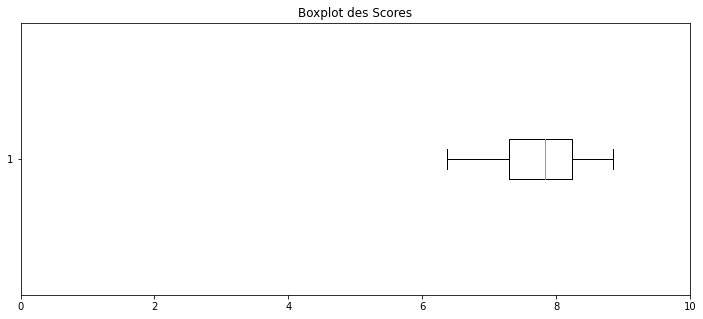

In [2]:
plt.figure(figsize = (12,5))
plt.boxplot(df.score, showfliers=False, vert=False)
plt.title("Boxplot des Scores")
plt.xlim(0,10)
plt.show()

## Création d'un nuage de points selon les scores par année.

<AxesSubplot:xlabel='année', ylabel='score'>

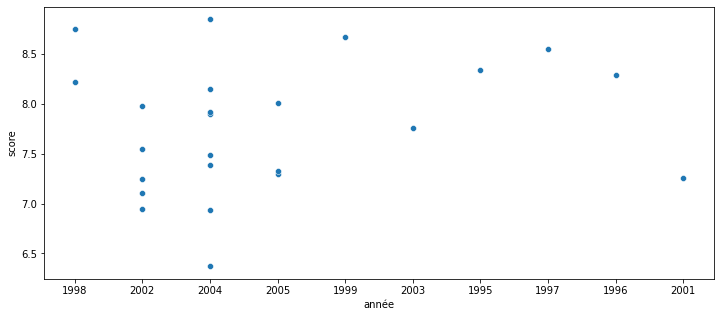

In [72]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = df["année"], y = df["score"])

## Création d'un nuage de points selon les scores par rapport au rang.

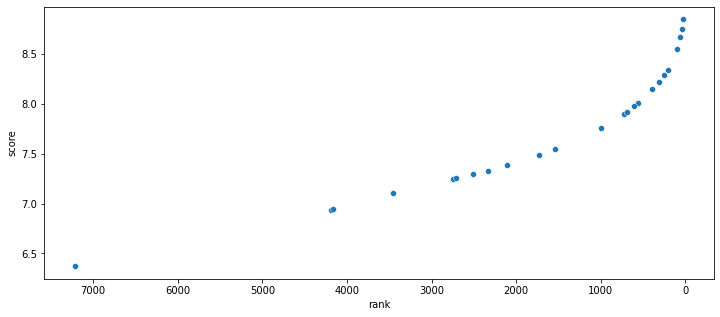

In [3]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = df["rank"], y = df["score"])
plt.gca().invert_xaxis()

## Création d'un graphique représentant la densité des scores.

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

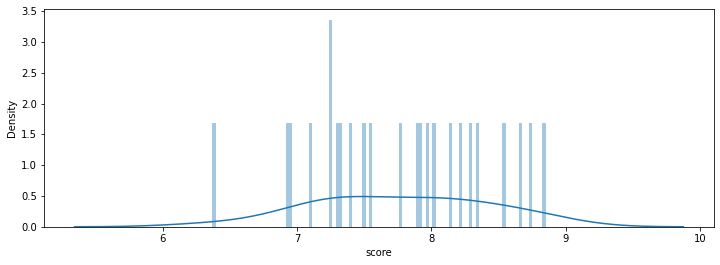

In [9]:
plt.figure(figsize=(12,4))
sns.distplot(df.score, bins=100)

## Création d'un nuage de points montrant la corrélation entre la note et le rang des animes.

<Figure size 1152x432 with 0 Axes>

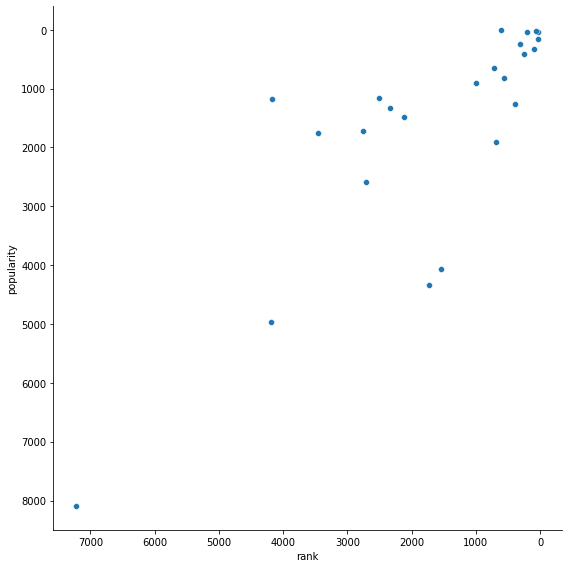

In [5]:
plt.figure(figsize=(16,6))
sns.relplot(x="rank", y="popularity", data = df, height=8);
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

### Création d'un graphique montrant l'évolution des scores par année.

### Création d'un graphique montrant l'évolution du classement de popularité par année.

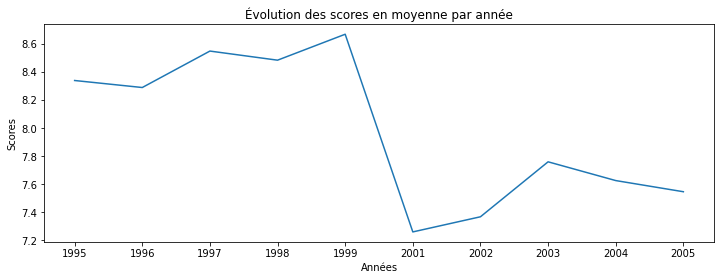

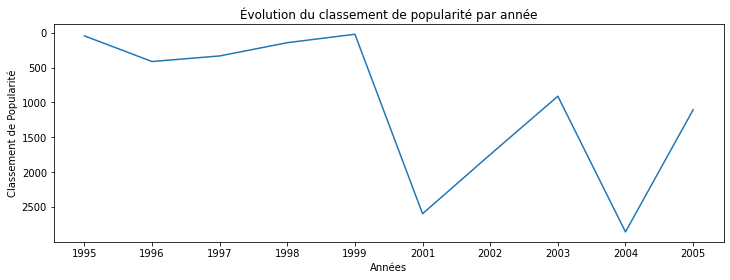

In [21]:
df1 = df.groupby(["année"]).mean()

plt.figure(figsize=(12,4))
plt.plot(df1.index, df1.score)
plt.xlabel('Années')
plt.ylabel('Scores')
plt.title('Évolution des scores en moyenne par année')

plt.figure(figsize=(12,4))
plt.plot(df1.index, df1.popularity)
plt.xlabel('Années')
plt.ylabel('Classement de Popularité')
plt.title('Évolution du classement de popularité par année')
plt.gca().invert_yaxis()

## Création d'un histogramme selon la saison de parutions et le score des animes.

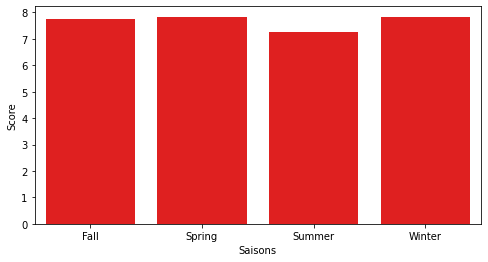

In [22]:
df2 = df.groupby(["saison"]).mean()

plt.figure(figsize=(8,4))
ax = sns.barplot(x = df2.index, y = df2.score, data=df2, color='red')
ax.set(xlabel='Saisons', ylabel='Score')
plt.show()

## Création d'un histogramme selon le type et le score des animes.

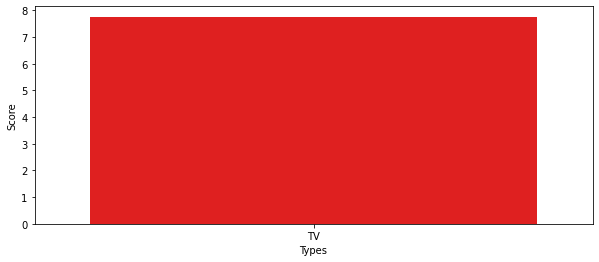

In [24]:
df3 = df.groupby(["type"]).mean()

plt.figure(figsize=(10,4))
ax = sns.barplot(x = df3.index, y = df3.score, data=df3, color='red')
ax.set(xlabel='Types', ylabel='Score')
plt.show()

## Création d'un histogramme selon le status et le score des animes.

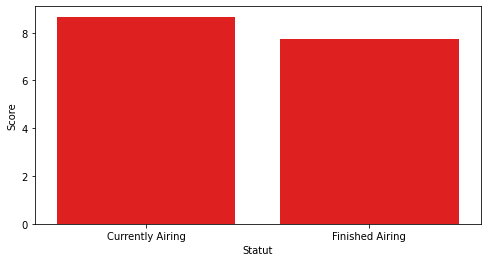

In [25]:
df4 = df.groupby(["status"]).mean()

plt.figure(figsize=(8,4))
ax = sns.barplot(x = df4.index, y = df4.score, data=df4, color='red')
ax.set(xlabel='Statut', ylabel='Score')
plt.show()

In [31]:
cursor.execute("SELECT genres FROM animes")

dataGenres = cursor.fetchall()

listeGenres = []

for genres in dataGenres:
    genresSplit = genres[0].split(", ")

    listeGenres.extend(genresSplit)

print(listeGenres)

listeGenres = list(set(listeGenres))

print(listeGenres)

['Action', 'Sci-Fi', 'Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Action', 'Drama', 'Mystery', 'Supernatural', 'Adventure', 'Fantasy', 'Supernatural', 'Comedy', 'Drama', 'Romance', 'Slice of Life', 'Comedy', 'Slice of Life', 'Sports', 'Action', 'Drama', 'Drama', 'Mystery', 'Suspense', 'Action', 'Adventure', 'Fantasy', 'Action', 'Adventure', 'Fantasy', 'Action', 'Sports', 'Comedy', 'Romance', 'Action', 'Adventure', 'Comedy', 'Sci-Fi', 'Ecchi', 'Action', 'Drama', 'Sci-Fi', 'Action', 'Supernatural', 'Comedy', 'Gourmet', 'Action', 'Drama', 'Sci-Fi', 'Action', 'Avant Garde', 'Award Winning', 'Drama', 'Sci-Fi', 'Suspense', 'Action', 'Adventure', 'Drama', 'Fantasy', 'Horror', 'Supernatural', 'Action', 'Adventure', 'Comedy', 'Romance', 'Adventure', 'Fantasy', 'Mystery', 'Sci-Fi', 'Comedy', 'Romance', 'Supernatural', 'Comedy', 'Drama', 'Sci-Fi', 'Sports', 'Comedy', 'Drama', 'Romance']
['Comedy', 'Sci-Fi', 'Ecchi', 'Supernatural', 'Slice of Life', 'Gourmet', 'Sports', 'Mystery', 'Fantasy

In [62]:
conn = sqlite3.connect('animangas.db')
cursor = conn.cursor()

dictGenres = {}

for genre in listeGenres:
    cursor.execute("SELECT score FROM animes WHERE genres LIKE ('%"+genre+"%')")
    dictGenres[genre] = {"moyenne":cursor.fetchone()[0]}

    {'Genre':'nom'}

print(dictGenres)

{'Comedy': {'moyenne': 8.22}, 'Sci-Fi': {'moyenne': 8.75}, 'Ecchi': {'moyenne': 7.39}, 'Supernatural': {'moyenne': 7.25}, 'Slice of Life': {'moyenne': 8.01}, 'Gourmet': {'moyenne': 7.92}, 'Sports': {'moyenne': 7.55}, 'Mystery': {'moyenne': 7.25}, 'Fantasy': {'moyenne': 6.94}, 'Award Winning': {'moyenne': 8.34}, 'Horror': {'moyenne': 8.55}, 'Adventure': {'moyenne': 8.22}, 'Avant Garde': {'moyenne': 8.34}, 'Romance': {'moyenne': 8.01}, 'Drama': {'moyenne': 8.22}, 'Action': {'moyenne': 8.75}, 'Suspense': {'moyenne': 8.85}}


In [67]:
df5 = pd.DataFrame(dictGenres)

print(df5)

         Comedy  Sci-Fi  Ecchi  Supernatural  Slice of Life  Gourmet  Sports  \
moyenne    8.22    8.75   7.39          7.25           8.01     7.92    7.55   

         Mystery  Fantasy  Award Winning  Horror  Adventure  Avant Garde  \
moyenne     7.25     6.94           8.34    8.55       8.22         8.34   

         Romance  Drama  Action  Suspense  
moyenne     8.01   8.22    8.75      8.85  


## Création d'un histogramme selon le score moyen de chaque genre.

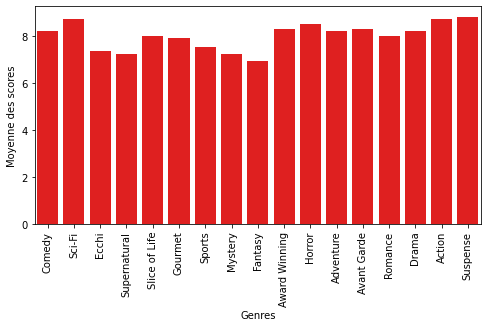

In [70]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df5, color='red')
ax.set(xlabel='Genres', ylabel='Moyenne des scores')
plt.xticks(rotation='vertical')
plt.show()